# 연령별 도서 키워드 분석

## 데이터 기본 정보 확인
- 연령별 도서 키워드 데이터

### 이 데이터로 내가 하고싶은것 간단히
- 가장 많이 검색한 키워드
  - 토탈
    - 1년 토탈 가장 많이 검색한 키워드 1개~
  - 연령별 가장 많이 검색한 키워드 1개~
    - 연령별 1년동안 가장 많이 검색한 1개~
- 키워드 검색 빈도
- 그 키워드의 검색이 많았던 연령대


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans


from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer


from matplotlib import font_manager, rc
from matplotlib import rcParams


### 데이터 불러오기 및 정보 확인

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DWN_DATA/NL_AGE_ACCTO_BOOK_KWRD_LIST_202112.csv')

In [3]:
df

,ANALS_TRGET_YEAR,ANALS_TRGET_MT,AGE_FLAG_NM,KWRD_RANK_CO,KWRD_NM,FQ_CO
0,2021,12,20대,1,사람,4679
1,2021,12,20대,2,자신,2011
2,2021,12,20대,3,사랑,1781
3,2021,12,20대,4,세계,1713
4,2021,12,20대,5,생각,1679
...,...,...,...,...,...,...
895,2021,12,초등(8~13),96,특별,259
896,2021,12,초등(8~13),97,추리,256
897,2021,12,초등(8~13),98,아빠,248
898,2021,12,초등(8~13),99,수상작,247


In [ ]:
df.describe()

In [4]:
df.head()

,ANALS_TRGET_YEAR,ANALS_TRGET_MT,AGE_FLAG_NM,KWRD_RANK_CO,KWRD_NM,FQ_CO
0,2021,12,20대,1,사람,4679
1,2021,12,20대,2,자신,2011
2,2021,12,20대,3,사랑,1781
3,2021,12,20대,4,세계,1713
4,2021,12,20대,5,생각,1679


In [37]:
df.columns

Index(['ANALS_TRGET_YEAR', 'ANALS_TRGET_MT', 'AGE_FLAG_NM', 'KWRD_RANK_CO',
       'KWRD_NM', 'FQ_CO'],
      dtype='object')

In [39]:
df['FQ_CO'].dtype

dtype('int64')

In [5]:
# 결측치 있는지 확인

df.isna().sum()

ANALS_TRGET_YEAR    0
ANALS_TRGET_MT      0
AGE_FLAG_NM         0
KWRD_RANK_CO        0
KWRD_NM             0
FQ_CO               0
dtype: int64

#### 원하는 컬럼만 가져오기

In [ ]:
## 분석에 쓸 데이터
## 타겟 이어 빼고 다
## 타겟 이어 컬럼만 빼고 다 가져오기

# df1 = df.loc[ : , [ 'AGE_FLAG_NM', 'KWRD_RANK_CO', 'KWRD_NM', 'FQ_CO' ]]
# df1

In [6]:
df1 = df.iloc[ : , 2: ]
df1

,AGE_FLAG_NM,KWRD_RANK_CO,KWRD_NM,FQ_CO
0,20대,1,사람,4679
1,20대,2,자신,2011
2,20대,3,사랑,1781
3,20대,4,세계,1713
4,20대,5,생각,1679
...,...,...,...,...
895,초등(8~13),96,특별,259
896,초등(8~13),97,추리,256
897,초등(8~13),98,아빠,248
898,초등(8~13),99,수상작,247


#### 1년 가장 많이 검색한 키워드 찾기

- 컬럼 명 한글로

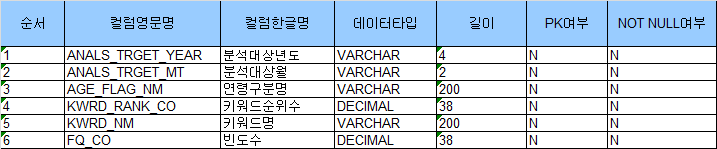

In [7]:
### 키워드별 총 빈도수를 구하고 싶을때 어떻게 해야할까
### FQ_CO 컬럼의 내용을 숫자로 바꾸기

df1['FQ_CO'] = pd.to_numeric(df1['FQ_CO'])
df1

,AGE_FLAG_NM,KWRD_RANK_CO,KWRD_NM,FQ_CO
0,20대,1,사람,4679
1,20대,2,자신,2011
2,20대,3,사랑,1781
3,20대,4,세계,1713
4,20대,5,생각,1679
...,...,...,...,...
895,초등(8~13),96,특별,259
896,초등(8~13),97,추리,256
897,초등(8~13),98,아빠,248
898,초등(8~13),99,수상작,247


In [8]:
### 1년 토탈 가장 많이 검색한 키워드

## 키워드 순위, 키워드명 가져와서 키워드 순위로 정렬한다음 보이기
## 키워드 순위(KWRD_RANK_CO) 와   키워드 명(KWRD_NM)만 가져오기 

# df1.loc[ : ,['KWRD_RANK_CO', 'KWRD_NM']].sort_values('KWRD_RANK_CO')

kwrd_ranking = df1.loc[ : , : ].sort_values('KWRD_RANK_CO')
kwrd_ranking

,AGE_FLAG_NM,KWRD_RANK_CO,KWRD_NM,FQ_CO
0,20대,1,사람,4679
300,50대,1,사람,4061
100,30대,1,아이,2644
800,초등(8~13),1,과학,2325
700,청소년(14~19),1,사람,3660
...,...,...,...,...
199,30대,100,자존감,273
699,유아(6~7),100,상상,240
99,20대,100,마지막,359
299,40대,100,재미,281


In [ ]:
### 월별 가장 많이 검색한 키워드  -->> 불가. 전부 12월임. 

#### 키워드 검색 빈도

In [9]:
### 검색 빈도수가 가장 많은 키워드 순

kwrd_fq = df1.loc[ : , : ].sort_values('FQ_CO', ascending = False)
kwrd_fq

,AGE_FLAG_NM,KWRD_RANK_CO,KWRD_NM,FQ_CO
0,20대,1,사람,4679
300,50대,1,사람,4061
301,50대,2,투자,3933
700,청소년(14~19),1,사람,3660
500,영유아(0~5),1,그림책,3356
...,...,...,...,...
595,영유아(0~5),95,베스트셀러,188
596,영유아(0~5),95,고민,188
597,영유아(0~5),98,유럽,187
598,영유아(0~5),99,사이,186


In [ ]:
### 최다 빈도순 10개

# kwrd_fq_10 = kwrd_fq.iloc[ 0:11 , : ]
# kwrd_fq_10

In [10]:
### 각 키워드별 몇개의 리뷰가 있는지 -->> 안함. 이건 너무 많다.

df1['KWRD_NM'].unique()

array(['사람', '자신', '사랑', '세계', '생각', '투자', '독자', '시작', '인생', '마음', '방법',
       '이유', '시간', '문제', '인간', '필요', '미국', '사회', '행복', '시대', '일본', '가지',
       '세상', '누구', '성공', '최고', '이해', '부자', '질문', '다양', '베스트셀러', '역사',
       '경험', '공부', '경제', '의미', '미래', '한국', '죽음', '여성', '존재', '변화', '습관',
       '선택', '지식', '부동산', '현실', '기업', '사건', '감정', '과정', '관계', '사실', '기록',
       '당신', '기술', '시장', '주식', '언어', '기억', '교수', '연구', '문장', '비밀', '장편소설',
       '자기', '친구', '순간', '처음', '철학', '전략', '고민', '이번', '행동', '성장', '분야',
       '모습', '가치', '문학', '이름', '오늘', '방식', '과학', '설명', '가족', '인물', '주인공',
       '일상', '시절', '상황', '활동', '수상', '상처', '노력', '기회', '시리즈', '얼마', '사이',
       '결정', '마지막', '아이', '엄마', '그림책', '어린이', '아이들', '영어', '한자', '그림',
       '학습', '만화', '신화', '부모', '아빠', '학습만화', '읽기', '여행', '상상력', '수학',
       '초등', '한국사', '마법', '대한민국', '어른', '해결', '카카오프렌즈', '구성', '캐릭터', '교육',
       '문화', '활용', '정보', '특별', '마법천자문', '유튜브', '원리', '탐정', '소개', '동화',
       '엉덩이', '인기', '그리스', '자존감', '실험', '발명', '대결', '교

In [11]:
### 키워드별 빈도수 찾기

kwrd_nm_fq = df1[['KWRD_NM', 'FQ_CO']].sort_values('FQ_CO', ascending = False)
kwrd_nm_fq.head(10)

,KWRD_NM,FQ_CO
0,사람,4679
300,사람,4061
301,투자,3933
700,사람,3660
500,그림책,3356
400,사람,2968
100,아이,2644
501,아이,2563
800,과학,2325
200,과학,2049


In [12]:
kwrd_nm_fq.loc[ kwrd_nm_fq['KWRD_NM'] == '사람' ,  ]

,KWRD_NM,FQ_CO
0,사람,4679
300,사람,4061
700,사람,3660
400,사람,2968
101,사람,1965
202,사람,1520
818,사람,782
617,사람,700
513,사람,672


In [13]:
### 키워드별 총 빈도수를 구하고 싶을때 어떻게 해야할까
### FQ_CO 컬럼의 내용을 숫자로 바꾸기 -- 바꿔놈


kwrd_human = kwrd_nm_fq.loc[ kwrd_nm_fq['KWRD_NM'] == '사람' ,  ]
kwrd_human['FQ_CO'].sum()




21007

##### 키워드별 검색 빈도수 총 합 구하기 - 그룹바이(groupby)

In [35]:
### 키워드별 총 합 구하기
### 그룹바이 함수 사용

# 키워드별로 묶어달라
# df1.groupby('KWRD_NM')

# 묶은 후 관심있는(알고싶은) 컬럼 붙이기
df1.groupby('KWRD_NM')['FQ_CO']

# 묶은 후 관심있는 컬럼 붙이고 그 컬럼의 합계 구하기
df1.groupby('KWRD_NM')['FQ_CO'].sum()


KWRD_NM
가족    3082
가지    4823
가치     876
감정    2146
강의     381
      ... 
현실    1932
혼불     620
화학     510
활동    2784
활용     999
Name: FQ_CO, Length: 266, dtype: int64

In [36]:
# 합계 구한 키워드들을 정렬하기 

(  df1.groupby('KWRD_NM')['FQ_CO'].sum()  ).sort_values(ascending = False)

KWRD_NM
사람    21007
세계    11562
아이    10288
투자    10211
자신     9997
      ...  
채소      193
펭귄      191
소중      190
음식      189
유럽      187
Name: FQ_CO, Length: 266, dtype: int64

#### 키워드 검색 빈도수가 1000건이 넘어가는 데이터만 남기기


In [31]:
###  데이터 검색 빈도수가 5천건이 넘어가면 별 5개
### 4천건이 넘어가면 별 4개
### 3천건이 넘어가면 별 3개
### 2천건이 넘어가면 별 2개
### 1천건이 넘어가면 별 1개
### 그 이하라면 별 0개

### 매겨서 '별' 항목에 추가하기


# 빈도수 데이터 가져오기
df1['FQ_CO']

def get_point(FQ_CO):
  if FQ_CO >= 5000 :
    return 5
  elif FQ_CO >= 4000 :
    return 4
  elif FQ_CO >= 3000 :
    return 3
  elif FQ_CO >= 2000 :
    return 2
  elif FQ_CO >= 1000 :
    return 1
  else :
    return 0




In [32]:

df1['star'] = df1['FQ_CO'].apply(get_point)



In [33]:
df1.head()

,AGE_FLAG_NM,KWRD_RANK_CO,KWRD_NM,FQ_CO,star
0,20대,1,사람,4679,4
1,20대,2,자신,2011,2
2,20대,3,사랑,1781,1
3,20대,4,세계,1713,1
4,20대,5,생각,1679,1


#### 연령대별 키워드 순위

In [14]:
### 연령대별 키워드 순위

df1['AGE_FLAG_NM'].unique()

array(['20대', '30대', '40대', '50대', '60대 이상', '영유아(0~5)', '유아(6~7)',
       '청소년(14~19)', '초등(8~13)'], dtype=object)

In [ ]:
### 연령대별 키워드 순위 가져오기


df1.loc[ df1['AGE_FLAG_NM'] == '20대' , ]


In [15]:
### 연령대별 키워드 순위

age20_rk = df1.loc[ df1['AGE_FLAG_NM'] == '20대' , ]
age20_rk

,AGE_FLAG_NM,KWRD_RANK_CO,KWRD_NM,FQ_CO
0,20대,1,사람,4679
1,20대,2,자신,2011
2,20대,3,사랑,1781
3,20대,4,세계,1713
4,20대,5,생각,1679
...,...,...,...,...
95,20대,95,시리즈,366
96,20대,97,얼마,365
97,20대,97,사이,365
98,20대,99,결정,362


In [16]:
age20_rk['FQ_CO'].values

array([4679, 2011, 1781, 1713, 1679, 1622, 1449, 1439, 1287, 1278, 1224,
       1166,  960,  956,  918,  889,  871,  867,  853,  831,  814,  803,
        778,  745,  734,  721,  705,  700,  684,  682,  676,  670,  665,
        646,  643,  641,  628,  627,  620,  620,  609,  605,  605,  586,
        568,  563,  556,  553,  547,  545,  540,  529,  521,  506,  490,
        489,  485,  481,  480,  472,  455,  450,  443,  442,  438,  437,
        433,  429,  427,  427,  421,  421,  419,  415,  406,  406,  405,
        404,  401,  399,  399,  393,  386,  380,  378,  378,  377,  376,
        374,  374,  373,  372,  370,  369,  366,  366,  365,  365,  362,
        359])

In [ ]:
# 문자 데이터 숫자로 변환하는 법
# df1['FQ_CO'] = pd.to_numeric(df1['FQ_CO'])
# df1

In [107]:
### 그래프를 그리기 위한 변수 리스트 만들기
# x 축에 그리고싶은건 KWRD_NM 의 이름들.
# 전부 그리는게 아니라 랭크 1~ 5위만 그리도록 하기
# age20_top5 = age20_rk.head()
# age20_top5

# 5위 안의 KWRD_NM 의 이름들을 리스트로 만들기

# age20_top5.values
# age20_top5['KWRD_NM'].values

,AGE_FLAG_NM,KWRD_RANK_CO,KWRD_NM,FQ_CO
0,20대,1,사람,4679
1,20대,2,자신,2011
2,20대,3,사랑,1781
3,20대,4,세계,1713
4,20대,5,생각,1679


In [102]:
# age20_top5_list = age20_top5['KWRD_NM'].to_list()
# age20_top5_list

['사람', '자신', '사랑', '세계', '생각']

In [17]:
age20_rk

,AGE_FLAG_NM,KWRD_RANK_CO,KWRD_NM,FQ_CO
0,20대,1,사람,4679
1,20대,2,자신,2011
2,20대,3,사랑,1781
3,20대,4,세계,1713
4,20대,5,생각,1679
...,...,...,...,...
95,20대,95,시리즈,366
96,20대,97,얼마,365
97,20대,97,사이,365
98,20대,99,결정,362


In [45]:
age30_rk = df1.loc[ df1['AGE_FLAG_NM'] == '30대' , ]
age30_rk

,AGE_FLAG_NM,KWRD_RANK_CO,KWRD_NM,FQ_CO
100,30대,1,아이,2644
101,30대,2,사람,1965
102,30대,3,투자,1440
103,30대,4,엄마,1370
104,30대,5,그림책,1264
...,...,...,...,...
195,30대,96,성장,278
196,30대,96,엉덩이,278
197,30대,96,인기,278
198,30대,99,그리스,277


In [46]:
age40_rk = df1.loc[ df1['AGE_FLAG_NM'] == '40대' , ]
age40_rk

,AGE_FLAG_NM,KWRD_RANK_CO,KWRD_NM,FQ_CO
200,40대,1,과학,2049
201,40대,2,아이,1602
202,40대,3,사람,1520
203,40대,4,어린이,1277
204,40대,5,투자,1264
...,...,...,...,...
295,40대,95,가족,288
296,40대,97,대상,287
297,40대,98,인기,286
298,40대,99,기억,283


In [47]:
age50_rk = df1.loc[ df1['AGE_FLAG_NM'] == '50대' , ]
age50_rk

,AGE_FLAG_NM,KWRD_RANK_CO,KWRD_NM,FQ_CO
300,50대,1,사람,4061
301,50대,2,투자,3933
302,50대,3,자신,1684
303,50대,4,인생,1615
304,50대,5,세계,1572
...,...,...,...,...
395,50대,96,연구,361
396,50대,97,준비,358
397,50대,97,인물,358
398,50대,99,얼마,357


In [48]:
age60_rk = df1.loc[ df1['AGE_FLAG_NM'] == '60대 이상' , ]
age60_rk

,AGE_FLAG_NM,KWRD_RANK_CO,KWRD_NM,FQ_CO
400,60대 이상,1,사람,2968
401,60대 이상,2,투자,1514
402,60대 이상,3,역사,1432
403,60대 이상,4,자신,1369
404,60대 이상,5,시작,1327
...,...,...,...,...
495,60대 이상,96,위기,324
496,60대 이상,97,성공,320
497,60대 이상,98,메타버스,319
498,60대 이상,99,문화,317


In [49]:
df1['AGE_FLAG_NM'].unique()

array(['20대', '30대', '40대', '50대', '60대 이상', '영유아(0~5)', '유아(6~7)',
       '청소년(14~19)', '초등(8~13)'], dtype=object)

In [50]:
age05_rk = df1.loc[ df1['AGE_FLAG_NM'] == '영유아(0~5)' , ]
age05_rk

,AGE_FLAG_NM,KWRD_RANK_CO,KWRD_NM,FQ_CO
500,영유아(0~5),1,그림책,3356
501,영유아(0~5),2,아이,2563
502,영유아(0~5),3,엄마,1493
503,영유아(0~5),4,마음,1202
504,영유아(0~5),5,친구,1100
...,...,...,...,...
595,영유아(0~5),95,베스트셀러,188
596,영유아(0~5),95,고민,188
597,영유아(0~5),98,유럽,187
598,영유아(0~5),99,사이,186


In [51]:
age6_rk = df1.loc[ df1['AGE_FLAG_NM'] == '유아(6~7)' , ]
age6_rk

,AGE_FLAG_NM,KWRD_RANK_CO,KWRD_NM,FQ_CO
600,유아(6~7),1,그림책,1737
601,유아(6~7),2,아이,1509
602,유아(6~7),3,한자,1484
603,유아(6~7),4,어린이,1421
604,유아(6~7),5,과학,1106
...,...,...,...,...
695,유아(6~7),96,소리,252
696,유아(6~7),97,쿠키,246
697,유아(6~7),98,머리,244
698,유아(6~7),99,배우,241


In [52]:
df1['AGE_FLAG_NM'].unique()

array(['20대', '30대', '40대', '50대', '60대 이상', '영유아(0~5)', '유아(6~7)',
       '청소년(14~19)', '초등(8~13)'], dtype=object)

In [53]:
age14_rk = df1.loc[ df1['AGE_FLAG_NM'] == '청소년(14~19)' , ]
age14_rk

,AGE_FLAG_NM,KWRD_RANK_CO,KWRD_NM,FQ_CO
700,청소년(14~19),1,사람,3660
701,청소년(14~19),2,세계,1856
702,청소년(14~19),3,수학,1530
703,청소년(14~19),4,자신,1501
704,청소년(14~19),5,사랑,1494
...,...,...,...,...
795,청소년(14~19),96,청소년,364
796,청소년(14~19),97,당신,357
797,청소년(14~19),97,경제,357
798,청소년(14~19),99,문학,356


In [54]:
age8_rk = df1.loc[ df1['AGE_FLAG_NM'] == '초등(8~13)' , ]
age8_rk

,AGE_FLAG_NM,KWRD_RANK_CO,KWRD_NM,FQ_CO
800,초등(8~13),1,과학,2325
801,초등(8~13),2,어린이,1738
802,초등(8~13),3,만화,1370
803,초등(8~13),4,역사,1190
804,초등(8~13),5,세계,1178
...,...,...,...,...
895,초등(8~13),96,특별,259
896,초등(8~13),97,추리,256
897,초등(8~13),98,아빠,248
898,초등(8~13),99,수상작,247


#### 가장 검색이 많았던 연령

In [ ]:
### 가장 검색이 많았던 연령  -->> 불가. 전부 데이터 100개씩임.


#### 키워드를 선택했을때 그 키워드를 가장 많이 선택한 연령대를 보여주기

In [30]:
### 키워드 선택 창 보여주기

df1['KWRD_NM'].unique()

array(['사람', '자신', '사랑', '세계', '생각', '투자', '독자', '시작', '인생', '마음', '방법',
       '이유', '시간', '문제', '인간', '필요', '미국', '사회', '행복', '시대', '일본', '가지',
       '세상', '누구', '성공', '최고', '이해', '부자', '질문', '다양', '베스트셀러', '역사',
       '경험', '공부', '경제', '의미', '미래', '한국', '죽음', '여성', '존재', '변화', '습관',
       '선택', '지식', '부동산', '현실', '기업', '사건', '감정', '과정', '관계', '사실', '기록',
       '당신', '기술', '시장', '주식', '언어', '기억', '교수', '연구', '문장', '비밀', '장편소설',
       '자기', '친구', '순간', '처음', '철학', '전략', '고민', '이번', '행동', '성장', '분야',
       '모습', '가치', '문학', '이름', '오늘', '방식', '과학', '설명', '가족', '인물', '주인공',
       '일상', '시절', '상황', '활동', '수상', '상처', '노력', '기회', '시리즈', '얼마', '사이',
       '결정', '마지막', '아이', '엄마', '그림책', '어린이', '아이들', '영어', '한자', '그림',
       '학습', '만화', '신화', '부모', '아빠', '학습만화', '읽기', '여행', '상상력', '수학',
       '초등', '한국사', '마법', '대한민국', '어른', '해결', '카카오프렌즈', '구성', '캐릭터', '교육',
       '문화', '활용', '정보', '특별', '마법천자문', '유튜브', '원리', '탐정', '소개', '동화',
       '엉덩이', '인기', '그리스', '자존감', '실험', '발명', '대결', '교

In [ ]:
### 키워드를 선택했을때 가장 많이 본 연령대 순으로 나오게 하기

df1.loc[ df1['KWRD_NM'] == 키워드 , ]

#### 그래프를 그려보자

In [ ]:
### 그래프의 공통적인 문제점

# 문자열이 깨져서 한글로 안나옴.

In [21]:
import matplotlib.pyplot as plt # 맷플롯립 import 하기
plt.rcParams['font.family'] = 'NanumBarunGothic' # 나눔바른고딕 적용하기

from matplotlib import font_manager, rc

from matplotlib import rcParams

In [20]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 34s (286 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122545 files and dir

- 나이대별 : 전체

In [18]:
### 랭킹순 데이터로 그래프 그리기

kwrd_ranking

,AGE_FLAG_NM,KWRD_RANK_CO,KWRD_NM,FQ_CO
0,20대,1,사람,4679
300,50대,1,사람,4061
100,30대,1,아이,2644
800,초등(8~13),1,과학,2325
700,청소년(14~19),1,사람,3660
...,...,...,...,...
199,30대,100,자존감,273
699,유아(6~7),100,상상,240
99,20대,100,마지막,359
299,40대,100,재미,281


In [19]:
kwrd_ranking.head()

,AGE_FLAG_NM,KWRD_RANK_CO,KWRD_NM,FQ_CO
0,20대,1,사람,4679
300,50대,1,사람,4061
100,30대,1,아이,2644
800,초등(8~13),1,과학,2325
700,청소년(14~19),1,사람,3660


<Axes: xlabel='KWRD_NM', ylabel='FQ_CO'>

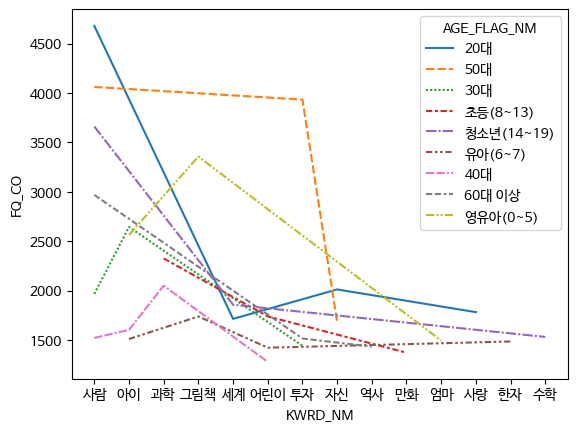

In [23]:

### 라인플롯으로 그래프 그리기

sns.lineplot(data = kwrd_ranking.head(30), 
             x = 'KWRD_NM', y = 'FQ_CO', hue = 'AGE_FLAG_NM', style = 'AGE_FLAG_NM')



In [ ]:

### 히스토그램으로 그림그리기

sns.histplot(x = 'KWRD_NM', hue = 'AGE_FLAG_NM', data = kwrd_ranking.head(30))

- 나이대별 : 20대

<Axes: xlabel='KWRD_NM', ylabel='FQ_CO'>

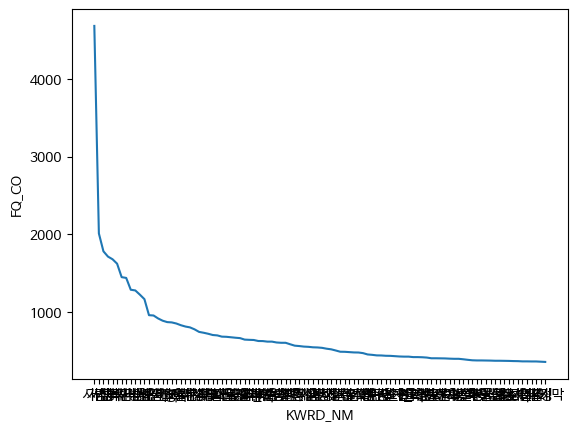

In [27]:

### 라인그래프 그리기

age20_rk

sns.lineplot( x = 'KWRD_NM', y = 'FQ_CO', data = age20_rk)


<Axes: xlabel='KWRD_NM', ylabel='FQ_CO'>

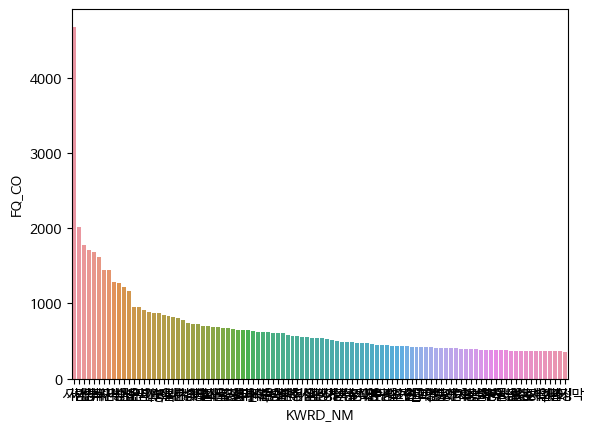

In [28]:

### 막대 그래프 그리기

sns.barplot(x= 'KWRD_NM' , y= 'FQ_CO', data= age20_rk)

## 데이터 학습
- 상관관계
- 회귀
- 클러스터링
이중 뭘 해야할까?

In [55]:
df1.head()

,AGE_FLAG_NM,KWRD_RANK_CO,KWRD_NM,FQ_CO
0,20대,1,사람,4679
1,20대,2,자신,2011
2,20대,3,사랑,1781
3,20대,4,세계,1713
4,20대,5,생각,1679


- 키워드별 분포 보기

In [ ]:
### 키워드별 나이 분포 보기
# x는 나이
# y 는 카운트
# 데이터는 키워드컬럼에서  가져오기

In [ ]:
## 데이터의 키워드 확인

df1['KWRD_NM'].unique()

#### 클러스터링